In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df=pd.read_csv("MetroPT3(AirCompressor).csv")

In [3]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
df.shape

(1516948, 17)

In [5]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.drop(['timestamp'],axis=1,inplace=True)

In [43]:
df.skew().sort_values(ascending=True)

Pressure_switch   -1.066710e+01
Caudal_impulses   -3.600981e+00
Towers            -3.092490e+00
Oil_level         -2.745832e+00
COMP              -1.824324e+00
MPG               -1.782406e+00
H1                -1.449794e+00
Oil_temperature   -4.579052e-02
Unnamed: 0         7.691699e-17
Reservoirs         4.235125e-02
TP3                4.270272e-02
Motor_current      4.485614e-01
DV_eletric         1.848671e+00
TP2                1.914417e+00
DV_pressure        4.909684e+00
LPS                1.701175e+01
dtype: float64

As the data is highly skewed, we will proceed to remove it using IQR method.

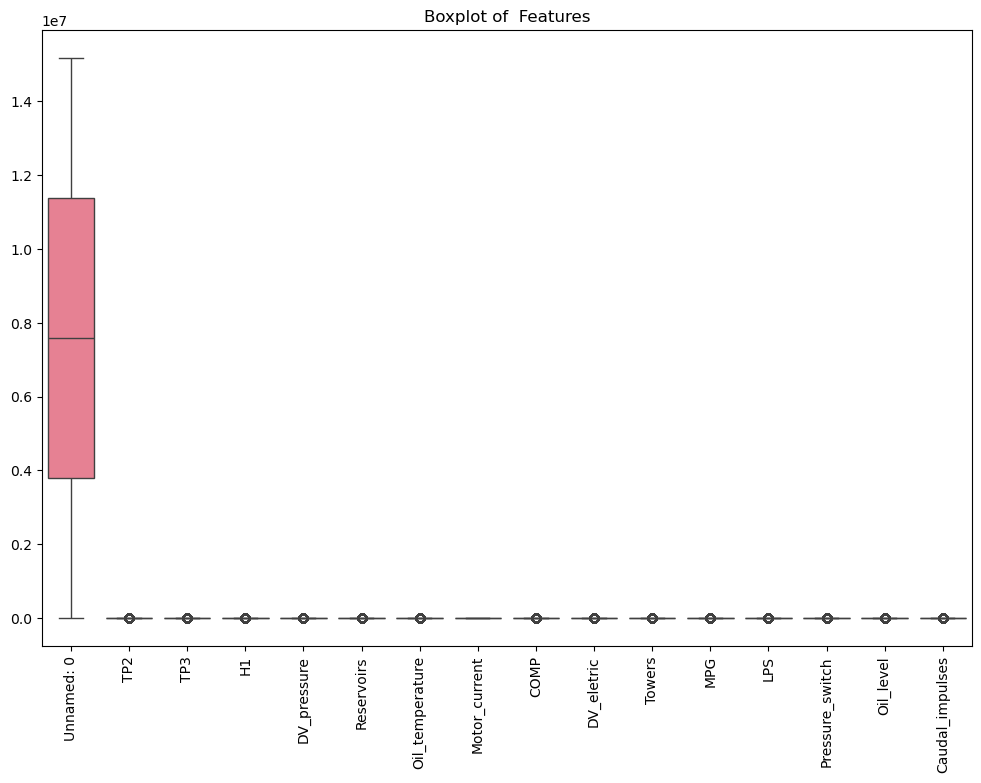

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [83]:
has_negatives = (df < 0).any().any()
print("DataFrame contains negative values:", has_negatives)

neg_cols = df.columns[(df < 0).any()]
print("Columns with negatives:", list(neg_cols))

DataFrame contains negative values: True
Columns with negatives: ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'COMP', 'Towers', 'MPG', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']


In [27]:
# def remove_outliers(data,columns):
#   data_filtered=df.copy()

#   for column in columns:
#      Q1 = data[column].quantile(0.25)
#      Q3 = data[column].quantile(0.75)
#      IQR = Q3 - Q1

#      lower_bound = Q1 - 1.5 * IQR
#      upper_bound = Q3 + 1.5* IQR

#      data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

#   return data_filtered

In [33]:
# new_df=remove_outliers(df,['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature','COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch','Oil_level','Caudal_impulses'])

In [166]:
pt = PowerTransformer(method='yeo-johnson')

for col in df.columns:
    if df[col].skew() < -0.5:
        df[col] = pt.fit_transform(df[[col]]).flatten()

print(df.skew().sort_values(ascending=True))

Pressure_switch   -1.066710e+01
Caudal_impulses   -3.600981e+00
Towers            -3.092490e+00
Oil_level         -2.745832e+00
COMP              -1.824324e+00
MPG               -1.782406e+00
H1                -7.591145e-02
Oil_temperature   -4.579052e-02
Unnamed: 0         7.691699e-17
Reservoirs         4.235125e-02
TP3                4.270272e-02
Motor_current      4.485614e-01
DV_eletric         1.848671e+00
TP2                1.914417e+00
DV_pressure        4.909684e+00
LPS                1.701175e+01
dtype: float64


In [168]:
def cap_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    df_capped = df.copy()
    
    for column in columns:
        lower_bound = df_capped[column].quantile(lower_quantile)
        upper_bound = df_capped[column].quantile(upper_quantile)
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped

columns_to_cap = ['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature',
                 'COMP','DV_eletric','Towers','MPG','LPS','Pressure_switch',
                 'Oil_level','Caudal_impulses']

new_df = cap_outliers(df, columns_to_cap)

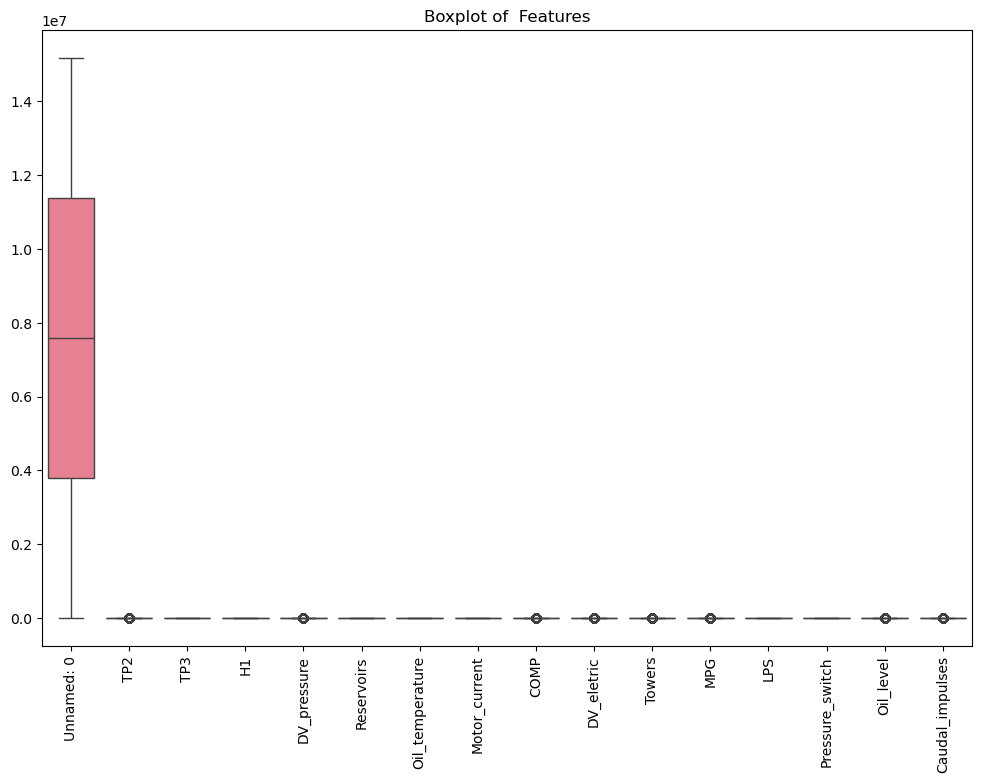

In [170]:
plt.figure(figsize=(12, 8))
sns.boxplot(new_df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [172]:
new_df.skew().sort_values(ascending=True)

Caudal_impulses   -3.600981e+00
Towers            -3.092490e+00
Oil_level         -2.745832e+00
COMP              -1.824324e+00
MPG               -1.782406e+00
H1                -8.853044e-02
LPS                0.000000e+00
Pressure_switch    0.000000e+00
Unnamed: 0         7.691699e-17
Oil_temperature    1.867301e-02
Reservoirs         2.798168e-01
TP3                2.809975e-01
Motor_current      4.485614e-01
DV_eletric         1.848671e+00
TP2                1.914251e+00
DV_pressure        4.803163e+00
dtype: float64

In [174]:
new_df.shape

(1516948, 16)

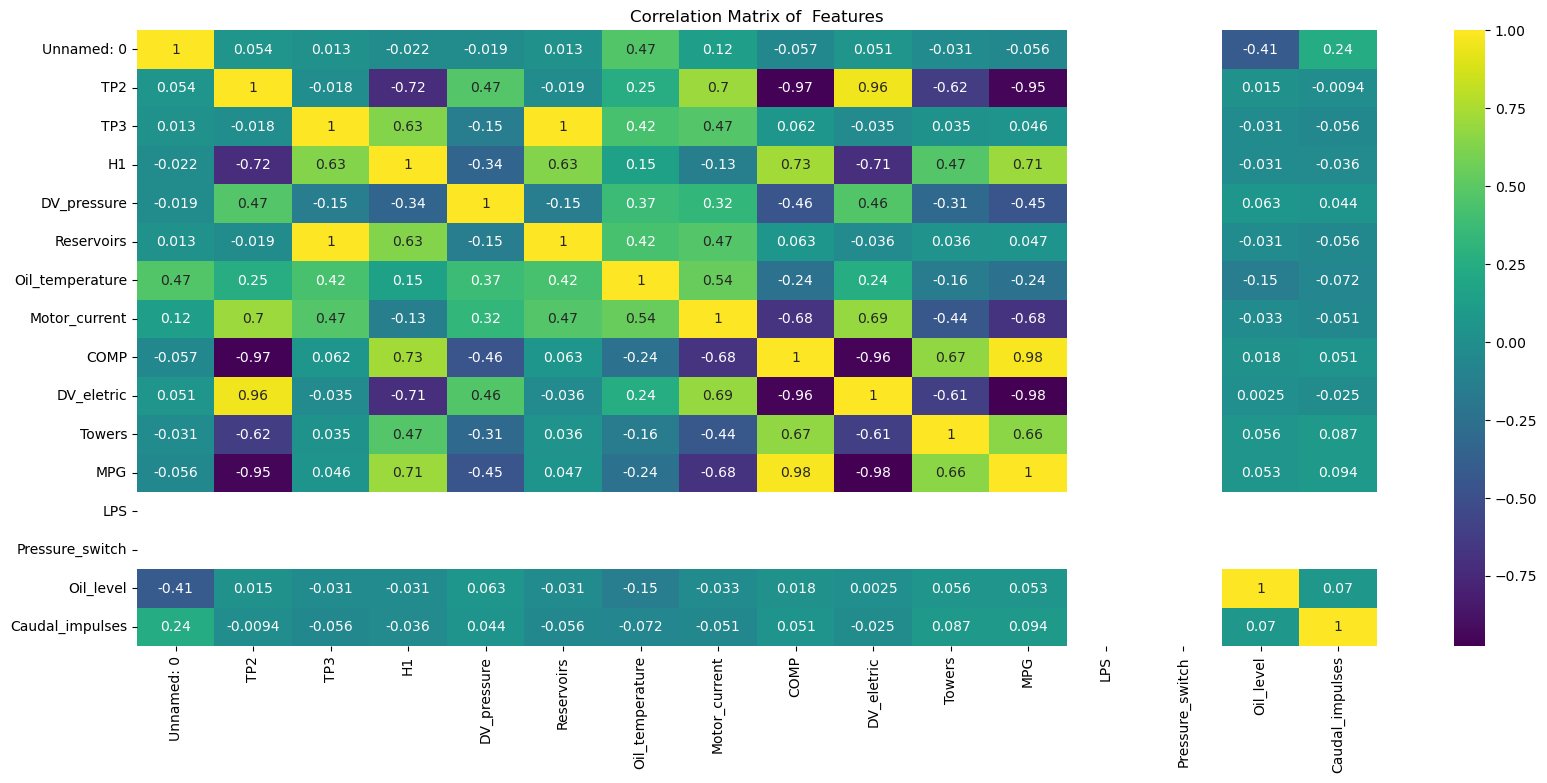

In [176]:
plt.figure(figsize=(20,8))
sns.heatmap(new_df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

In [190]:
X = new_df.drop(columns=['Caudal_impulses'])
y = new_df['Caudal_impulses']

select_k = SelectKBest(score_func=f_classif, k=11)  #based on the ANOVA F-value, selecting top k features
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()] # to find scores of all features

print("Selected Features:", selected_features)
print("Feature Scores based on select_k:", selected_scores)


# Create a DataFrame to display feature names and scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})


# Sort by scores in ascending order
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print results
print("Selected Features:\n", feature_scores_df)

Selected Features: Index(['Unnamed: 0', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'Towers', 'MPG',
       'Oil_level'],
      dtype='object')
Feature Scores based on select_k: [92026.07034413  4851.70909204  2018.12538266  2971.48877838
  4697.12236877  7911.31201708  3978.4248924   3913.22461465
 11626.75865442 13667.80895226  7525.34941386]
Selected Features:
             Feature         Score
0        Unnamed: 0  92026.070344
9               MPG  13667.808952
8            Towers  11626.758654
5   Oil_temperature   7911.312017
10        Oil_level   7525.349414
1               TP3   4851.709092
4        Reservoirs   4697.122369
6     Motor_current   3978.424892
7              COMP   3913.224615
3       DV_pressure   2971.488778
2                H1   2018.125383
